In [3]:
# getting the required models and readers
!pip install PyPDF2 python-docx spacy matplotlib



Menu:
1. Enter a Job Description and Upload Resumes
2. Exit
Enter your choice (1/2): 1
Enter the job description:
Job Description: Hands-on experience in object-oriented programming languages such as Java, C++, or Python. Knowledge of web development frameworks like React, Angular, or Vue.js. Knowledge of databases, SQL syntax, and NoSQL databases (e.g., MongoDB, Postgres, etc.). Excellent problem-solving and analytical skills. Strong verbal and written communication skills. Ability to work independently and collaboratively in a fast-paced agile environment. B.E/B.Tech/M.C.A/M.Tech in Computer Science or equivalent practical experience.
Extracted Keywords from Job Description: {'work', 'mongodb', 'like', 'syntax', 'collaboratively', 'databases', 'python', 'skills', 'independently', 'frameworks', 'sql', 'excellent', 'equivalent', 'knowledge', 'agile', 'computer', 'written', 'handson', 'practical', 'java', 'postgres', 'development', 'c', 'verbal', 'bebtechmcamtech', 'programming', 'eg',

Saving Data Scientist.pdf to Data Scientist (2).pdf

Resume Ranking:
Rank 1: Data Scientist (2).pdf | Score: 25.00% | Matched Keywords: {'development', 'communication', 'sql', 'environment', 'analytical', 'etc', 'science', 'python', 'skills', 'strong', 'experience'}


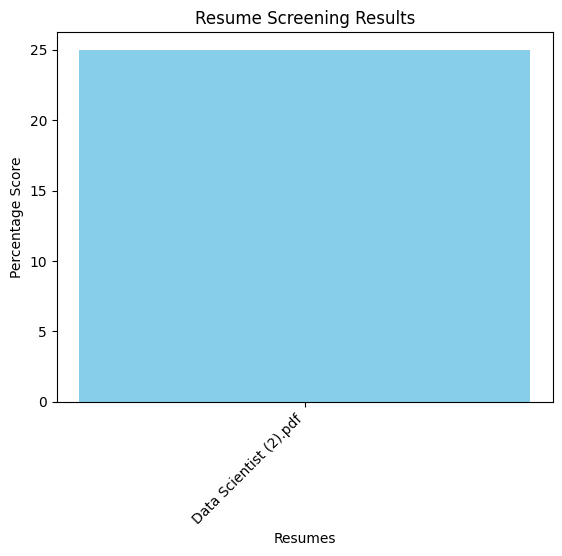


Menu:
1. Enter a Job Description and Upload Resumes
2. Exit
Enter your choice (1/2): Proficiency in programming languages such as Python or R for data analysis and machine learning. Strong analytical and problem-solving skills. Basic understanding of statistical concepts and techniques. Familiarity with data visualization tools such as Matplotlib, Seaborn, or Tableau. Ability to work with large datasets and databases. Good communication and collaboration skills. Eagerness to learn and adapt to new tools and technologies. Attention to detail and accuracy in data analysis and interpretation.
Invalid choice. Please try again.

Menu:
1. Enter a Job Description and Upload Resumes
2. Exit
Enter your choice (1/2): 1
Enter the job description:
Job Description: Proficiency in programming languages such as Python or R for data analysis and machine learning. Strong analytical and problem-solving skills. Basic understanding of statistical concepts and techniques. Familiarity with data visualizati

Saving Data Scientist.pdf to Data Scientist (3).pdf

Resume Ranking:
Rank 1: Data Scientist (3).pdf | Score: 39.02% | Matched Keywords: {'large', 'communication', 'tools', 'machine', 'data', 'learning', 'visualization', 'analytical', 'python', 'understanding', 'skills', 'statistical', 'strong', 'analysis', 'new', 'techniques'}


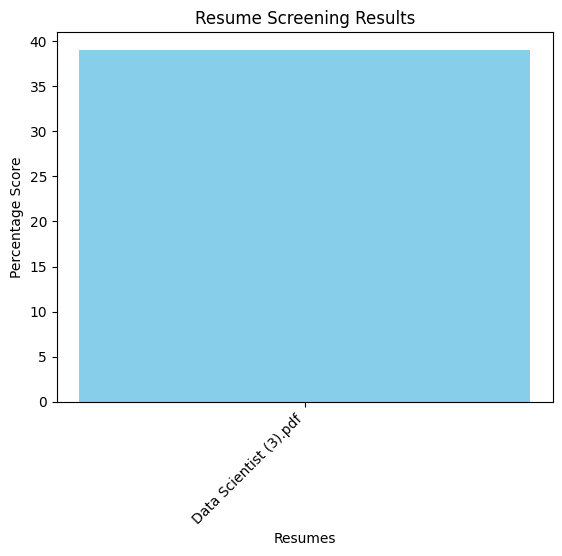


Menu:
1. Enter a Job Description and Upload Resumes
2. Exit
Enter your choice (1/2): 2
Exiting the program. Thank you!


In [4]:
import spacy
import PyPDF2
import docx
import re
import matplotlib.pyplot as plt

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
        return text

# Function to extract text from DOCX
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    return '\n'.join([p.text for p in doc.paragraphs])

# Function to clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()

# Function to extract keywords from job description
def extract_keywords(job_description):
    doc = nlp(job_description)
    keywords = {token.text for token in doc if token.is_alpha and not token.is_stop}
    return keywords

# Function to score a resume
def score_resume(resume_text, keywords):
    words = set(resume_text.split())
    matched_keywords = words & keywords
    return len(matched_keywords), matched_keywords

# Main function
def main():
    while True:
        print("\nMenu:")
        print("1. Enter a Job Description and Upload Resumes")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")

        if choice == '1':
            # Step 1: Get user input for job description
            print("Enter the job description:")
            job_description = input("Job Description: ")
            job_keywords = extract_keywords(preprocess_text(job_description))
            print(f"Extracted Keywords from Job Description: {job_keywords}")
            total_keywords = len(job_keywords)

            # Step 2: Upload resumes
            from google.colab import files
            uploaded_files = files.upload()

            scores = []

            # Step 3: Process each uploaded file
            for file_name in uploaded_files.keys():
                if file_name.endswith(".pdf"):
                    text = extract_text_from_pdf(file_name)
                elif file_name.endswith(".docx"):
                    text = extract_text_from_docx(file_name)
                elif file_name.endswith(".csv"):
                  with open(file_name, newline='', encoding='utf-8') as csv_file:
                    text = ' '.join(row[0] for row in csv.reader(csv_file))
                else:
                    print(f"Unsupported file format: {file_name}")
                    continue

                preprocessed_text = preprocess_text(text)
                matched_count, matched_keywords = score_resume(preprocessed_text, job_keywords)
                percentage_score = (matched_count / total_keywords) * 100 if total_keywords > 0 else 0
                scores.append((file_name, percentage_score, matched_keywords))

            # Step 4: Display results
            scores.sort(key=lambda x: x[1], reverse=True)
            print("\nResume Ranking:")
            for rank, (file_name, percentage_score, matched_keywords) in enumerate(scores, start=1):
                print(f"Rank {rank}: {file_name} | Score: {percentage_score:.2f}% | Matched Keywords: {matched_keywords}")

            # Step 5: Visualization
            labels = [file[0] for file in scores]
            values = [file[1] for file in scores]
            plt.bar(labels, values, color='skyblue')
            plt.xlabel('Resumes')
            plt.ylabel('Percentage Score')
            plt.title('Resume Screening Results')
            plt.xticks(rotation=45, ha='right')
            plt.show()

        elif choice == '2':
            print("Exiting the program. Thank you!")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the main function
main()
